In [1]:
#New New

In [153]:
from os import error
from bs4 import BeautifulSoup
from numpy import string_
import requests
import datetime
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [154]:
athletes=pd.read_csv('C:/Users/A/Downloads/Data Sience Project/res_.csv')

In [155]:
athletes.dtypes
# סוג המשתנים

Unnamed: 0           int64
year of birth      float64
season              object
city                object
kg                 float64
compettion_year      int64
cm                 float64
pos                 object
sex                 object
compettor           object
event               object
age                float64
medal               object
noc                 object
dtype: object

In [156]:
athletes.shape
#כמות נתונים

(154, 14)

In [157]:
athletes.head()
#Show Table

,Unnamed: 0,year of birth,season,city,kg,compettion_year,cm,pos,sex,compettor,event,age,medal,noc
0,0,1932.0,summer,Roma,71.0,1960,171.0,1,Male,Boris Shakhlin,"Individual All-Around, Men",28.0,Gold,Soviet Union Ukraine
1,0,1931.0,summer,Roma,58.0,1960,160.0,2,Male,Takashi Ono,"Individual All-Around, Men",29.0,Silver,Japan
2,0,1935.0,summer,Roma,70.0,1960,170.0,3,Male,Yury Titov,"Individual All-Around, Men",25.0,Bronze,Russian Federation Soviet Union
3,0,1938.0,summer,Roma,52.0,1960,158.0,4,Male,Shuji Tsurumi,"Individual All-Around, Men",22.0,NaN,Japan
4,0,1937.0,summer,Roma,58.0,1960,161.0,=5,Male,Yukio Endo,"Individual All-Around, Men",23.0,NaN,Japan


In [158]:
medal_num={'Gold':1,'Silver':2,'Bronze':3}
sex_num={'Female':1,'Male':0}
athletes.medal.replace(medal_num,inplace=True)
athletes.sex.replace(sex_num,inplace=True)
athletes = athletes.iloc[: , 1:]
athletes.head()#Show Table
#Convert the medal and the sex column to numbers

,year of birth,season,city,kg,compettion_year,cm,pos,sex,compettor,event,age,medal,noc
0,1932.0,summer,Roma,71.0,1960,171.0,1,0,Boris Shakhlin,"Individual All-Around, Men",28.0,1.0,Soviet Union Ukraine
1,1931.0,summer,Roma,58.0,1960,160.0,2,0,Takashi Ono,"Individual All-Around, Men",29.0,2.0,Japan
2,1935.0,summer,Roma,70.0,1960,170.0,3,0,Yury Titov,"Individual All-Around, Men",25.0,3.0,Russian Federation Soviet Union
3,1938.0,summer,Roma,52.0,1960,158.0,4,0,Shuji Tsurumi,"Individual All-Around, Men",22.0,NaN,Japan
4,1937.0,summer,Roma,58.0,1960,161.0,=5,0,Yukio Endo,"Individual All-Around, Men",23.0,NaN,Japan


In [159]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year of birth    144 non-null    float64
 1   season           154 non-null    object 
 2   city             154 non-null    object 
 3   kg               135 non-null    float64
 4   compettion_year  154 non-null    int64  
 5   cm               135 non-null    float64
 6   pos              154 non-null    object 
 7   sex              154 non-null    int64  
 8   compettor        154 non-null    object 
 9   event            154 non-null    object 
 10  age              144 non-null    float64
 11  medal            6 non-null      float64
 12  noc              154 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 15.8+ KB


In [160]:
athletes.isnull().sum()

year of birth       10
season               0
city                 0
kg                  19
compettion_year      0
cm                  19
pos                  0
sex                  0
compettor            0
event                0
age                 10
medal              148
noc                  0
dtype: int64

In [161]:
athletes['pos'] = athletes['pos'].fillna(0)
athletes['medal'] = athletes['medal'].fillna(0)
athletes.head()
# Replacing all the NaN values to 0 in the pos column.

,year of birth,season,city,kg,compettion_year,cm,pos,sex,compettor,event,age,medal,noc
0,1932.0,summer,Roma,71.0,1960,171.0,1,0,Boris Shakhlin,"Individual All-Around, Men",28.0,1.0,Soviet Union Ukraine
1,1931.0,summer,Roma,58.0,1960,160.0,2,0,Takashi Ono,"Individual All-Around, Men",29.0,2.0,Japan
2,1935.0,summer,Roma,70.0,1960,170.0,3,0,Yury Titov,"Individual All-Around, Men",25.0,3.0,Russian Federation Soviet Union
3,1938.0,summer,Roma,52.0,1960,158.0,4,0,Shuji Tsurumi,"Individual All-Around, Men",22.0,0.0,Japan
4,1937.0,summer,Roma,58.0,1960,161.0,=5,0,Yukio Endo,"Individual All-Around, Men",23.0,0.0,Japan


In [162]:
#
# We hane NaN and None - check what we need to do with the drop and fillna!!!!!!!!!! 
#

In [163]:
athletes.duplicated().sum()
#sum the duplicated rows

0

In [164]:
athletes.drop_duplicates()
# delete the double rows

,year of birth,season,city,kg,compettion_year,cm,pos,sex,compettor,event,age,medal,noc
0,1932.0,summer,Roma,71.0,1960,171.0,1,0,Boris Shakhlin,"Individual All-Around, Men",28.0,1.0,Soviet Union Ukraine
1,1931.0,summer,Roma,58.0,1960,160.0,2,0,Takashi Ono,"Individual All-Around, Men",29.0,2.0,Japan
2,1935.0,summer,Roma,70.0,1960,170.0,3,0,Yury Titov,"Individual All-Around, Men",25.0,3.0,Russian Federation Soviet Union
3,1938.0,summer,Roma,52.0,1960,158.0,4,0,Shuji Tsurumi,"Individual All-Around, Men",22.0,0.0,Japan
4,1937.0,summer,Roma,58.0,1960,161.0,=5,0,Yukio Endo,"Individual All-Around, Men",23.0,0.0,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1937.0,summer,Roma,68.0,1960,170.0,=19 r1/2,0,Alfred Kucharczyk,"Floor Exercise, Men",23.0,0.0,Poland
150,1932.0,summer,Roma,67.0,1960,171.0,21 r1/2,0,William Thoresson,"Floor Exercise, Men",28.0,0.0,Sweden
151,1935.0,summer,Roma,60.0,1960,163.0,=22 r1/2,0,Rudolf Keszthelyi,"Floor Exercise, Men",25.0,0.0,Hungary
152,1936.0,summer,Roma,70.0,1960,172.0,=22 r1/2,0,Philipp Fürst,"Floor Exercise, Men",24.0,0.0,Germany


In [165]:
#athletes = athletes.drop(athletes.index[athletes.age == "None"])

#athletes["age"] = athletes["age"].astype("int") 
#athletes["medal"] = athletes["medal"].astype("int") 
#athletes["year of birth"] = athletes["year of birth"].astype("int") 
#athletes.dtypes
#Convert object to int (age, year of birth)

C:\Users\A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

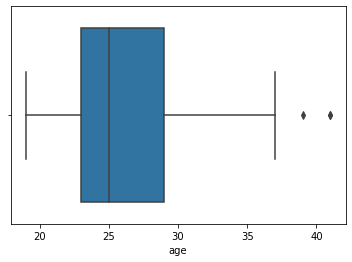

In [166]:
sns.boxplot(athletes.age)
#גרף לחריגים בגילאים

In [167]:
athletes.age.describe()
#מראה את הגיל המינימאלי מקסימלי וכו

count    144.000000
mean      26.152778
std        4.257974
min       19.000000
25%       23.000000
50%       25.000000
75%       29.000000
max       41.000000
Name: age, dtype: float64

In [168]:
top_10_countries=athletes.noc.value_counts().sort_values(ascending=False).head(10)
top_10_countries
#עשר המדינות הטובות בעולם

Japan             12
Czechoslovakia     8
Poland             8
Yugoslavia         7
Sweden             7
Switzerland        7
Finland            7
Hungary            7
Italy              7
Spain              6
Name: noc, dtype: int64

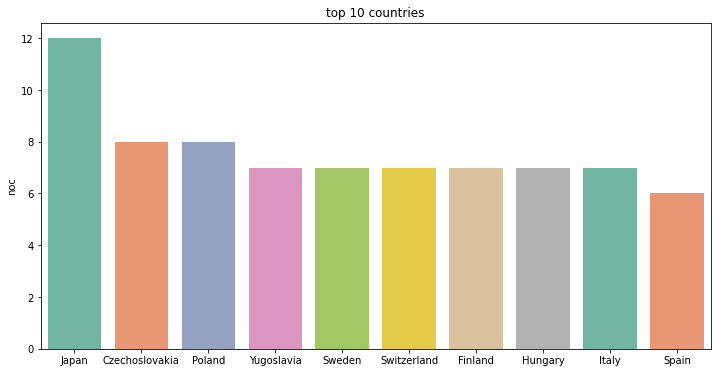

In [169]:
#plot for the top 10 countries

plt.figure(figsize=(12,6))
plt.title('top 10 countries')
sns.barplot(x=top_10_countries.index,y=top_10_countries,palette='Set2');

In [170]:
gender_counts=athletes.sex.value_counts()
gender_counts

0    154
Name: sex, dtype: int64

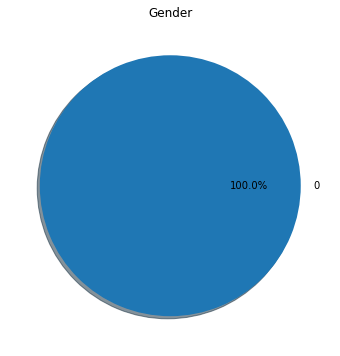

In [171]:
plt.figure(figsize=(12,6))
plt.title('Gender')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180,shadow=True);

(array([ 0.,  0.,  0.,  0.,  3., 12., 25., 37., 15., 27., 12.,  5.,  3.,
         2.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

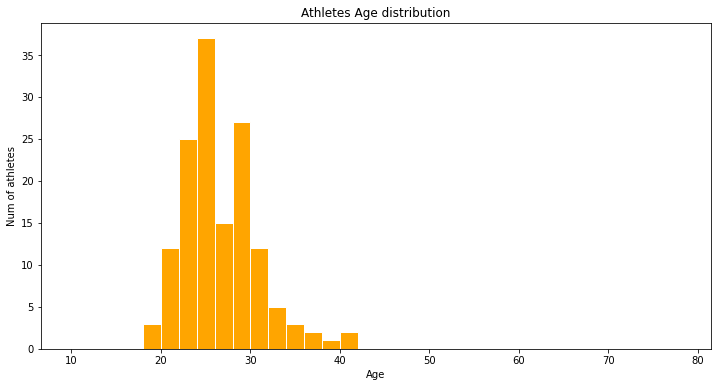

In [172]:
plt.figure(figsize=(12,6))
plt.title("Athletes Age distribution")
plt.xlabel("Age")
plt.ylabel("Num of athletes")
plt.hist(athletes.age, bins=np.arange(10,80,2),color='orange',edgecolor='white')

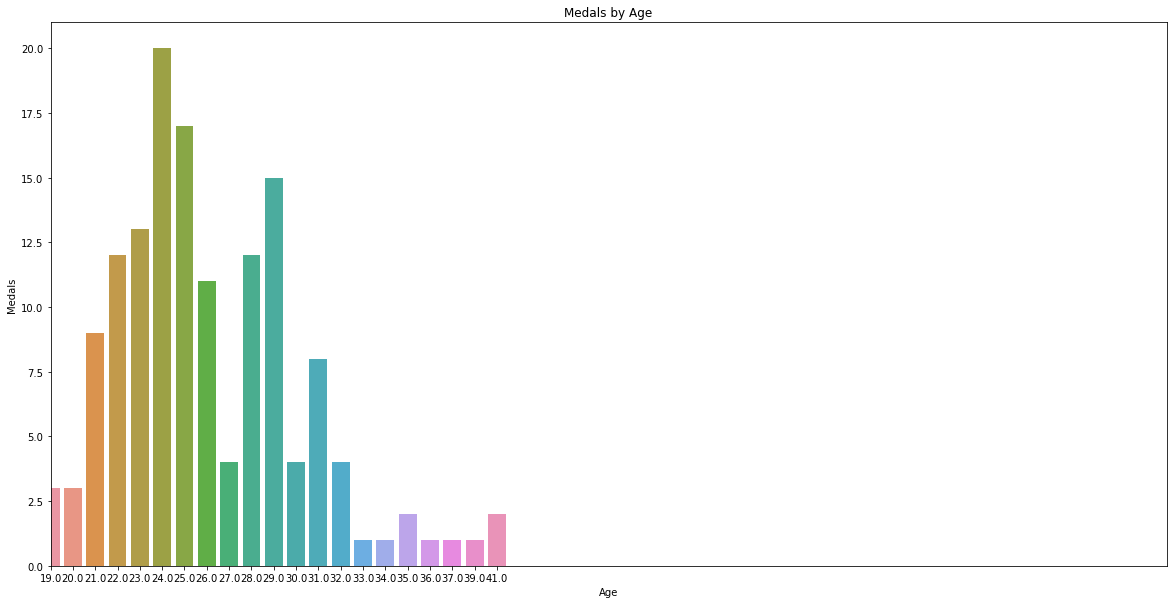

In [173]:
plt.figure(figsize=(20, 10))
a_medal=athletes.groupby('age')['medal'].count().reset_index()
sns.barplot(x='age',y='medal',data=a_medal)
plt.title('Medals by Age')
plt.xlim(0,50)
plt.xlabel('Age')
plt.ylabel('Medals')
plt.show()

In [176]:
Contingent_Size=athletes.copy()
Contingent_Size['total_athletes']=''
Contingent_Size=Contingent_Size.loc[:,['compettion_year', 'noc','total_athletes']].groupby(['compettion_year', 'noc']).count().reset_index()
Contingent_Size=Contingent_Size.rename(columns={'noc':'Country Name','compettion_year':'Year'})
Contingent_Size.head()

#גודל משלחת לפי שנה ולפי מדינה

#add a grafh

,Year,Country Name,total_athletes
0,1960,Algeria France,1
1,1960,Argentina,1
2,1960,Armenia Soviet Union,2
3,1960,Australia,2
4,1960,Austria,6


In [177]:
###########################
#athletes_=pd.read_csv('C:/Users/A/Downloads/Data Sience Project/test.csv')
#athletes_.dtypes
###########################
#Fix it after the new csv file.

Text(0.5, 0, 'compettion_year')

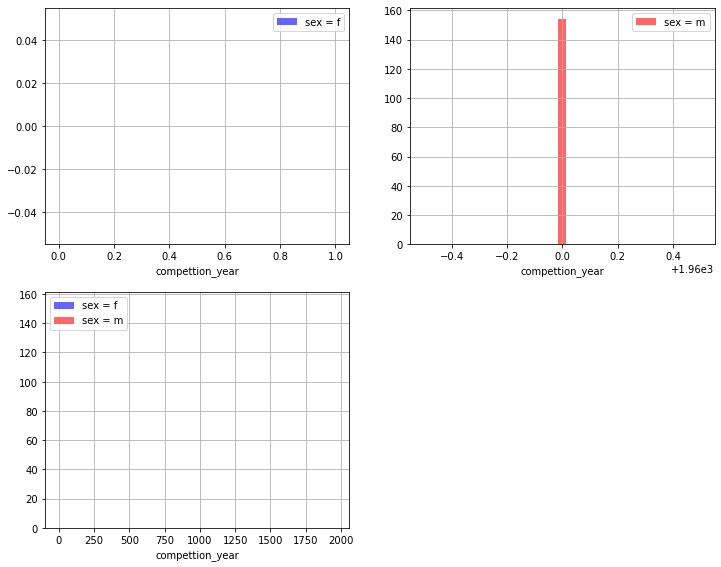

In [178]:
plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
athletes[athletes["sex"] == 1]["compettion_year"].hist(bins=35, color='blue', label='sex = f', alpha=0.6)
plt.legend()
plt.xlabel("compettion_year")

plt.subplot(4, 2, 2)
athletes[athletes["sex"] ==0]["compettion_year"].hist(bins=35, color='red', label='sex = m', alpha=0.6)
plt.legend()
plt.xlabel("compettion_year")

plt.subplot(4, 2, 3)
athletes[athletes["sex"] == 1]["compettion_year"].hist(bins=35, color='blue', label='sex = f', alpha=0.6)
athletes[athletes["sex"] == 0]["compettion_year"].hist(bins=35, color='red', label='sex = m', alpha=0.6)
plt.legend()
plt.xlabel("compettion_year")


#לשנות בהתאם לקובץ החדש 
#לדוגמא פיימייל ומייל צריכים להיות אפס ואחד וכו

In [179]:
pop = pd.read_csv('C:/Users/A/Downloads/Data Sience Project/pop.csv')
pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

pop = pd.melt(pop, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'World Population')

pop['Year'] = pd.to_numeric(pop['Year'])
pop.head()


,Country Name,Country Code,Year,World Population
0,Aruba,ABW,1960,54208.0
1,Africa Eastern and Southern,AFE,1960,130836765.0
2,Afghanistan,AFG,1960,8996967.0
3,Africa Western and Central,AFW,1960,96396419.0
4,Angola,AGO,1960,5454938.0


In [180]:
w_pop = pd.read_csv('C:/Users/A/Downloads/Data Sience Project/womanPopulation.csv')
w_pop = w_pop.dropna()
w_pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

w_pop = pd.melt(w_pop, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'Woman Population%')

w_pop['Year'] = pd.to_numeric(w_pop['Year'])

w_pop.head()


,Country Name,Country Code,Year,Woman Population%
0,Aruba,ABW,1960,50.979560
1,Africa Eastern and Southern,AFE,1960,50.550028
2,Afghanistan,AFG,1960,48.320662
3,Africa Western and Central,AFW,1960,50.206989
4,Angola,AGO,1960,49.335629


In [181]:
gdp = pd.read_csv('C:/Users/A/Downloads/Data Sience Project/w_gdp.csv')

gdp.drop(['Indicator Name' , 'Indicator Code'], axis = 1, inplace = True)

gdp = pd.melt(gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'gdp')

gdp['Year'] = pd.to_numeric(gdp['Year'])


gdp.head()


,Country Name,Country Code,Year,gdp
0,Afghanistan,AFG,1960,537777811
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2723648552
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [182]:
athletes=athletes.rename(columns={'noc':'Country Name','compettion_year':'Year'})

print(athletes_)

       Unnamed: 0  year of birth             noc     cm   age   medal  season  \
0               0         1869.0         Germany  159.0  27.0    Gold  summer   
1               0         1865.0     Switzerland    NaN  31.0  Silver  summer   
2               0         1864.0         Germany    NaN  32.0  Bronze  summer   
3               0         1875.0          Sweden    NaN  21.0     NaN  summer   
4               0         1870.0         Germany    NaN  26.0     NaN  summer   
...           ...            ...             ...    ...   ...     ...     ...   
13909           0         1902.0          France    NaN  22.0     NaN  summer   
13910           0         1894.0     Switzerland    NaN  30.0     NaN  summer   
13911           0         1893.0         Denmark    NaN  31.0     NaN  summer   
13912           0         1901.0   Great Britain    NaN  23.0     NaN  summer   
13913           0         1903.0           Chile    NaN  21.0     NaN  summer   

                 compettor 

In [184]:
athletes_merge=pop.merge(gdp, how='inner', on=['Country Name','Year','Country Code'])
athletes_merge=athletes_merge.merge(w_pop, how='inner', on=['Country Name','Year','Country Code'])

#athletes_merge=athletes_merge.merge(Contingent_Size, how='inner', on=['Country Name','Year'])


athletes_merge=athletes_merge.merge(athletes, how='inner', on=['Country Name','Year'])


athletes_merge.head(70)

,Country Name,Country Code,Year,World Population,gdp,Woman Population%,year of birth,season,city,kg,cm,pos,sex,compettor,event,age,medal
0,Argentina,ARG,1960,20481781.0,el,49.559963,1929.0,summer,Roma,62.0,164.0,116,0,Juan Caviglia,"Individual All-Around, Men",31.0,0.0
1,Australia,AUS,1960,10276477.0,18593347519,49.513272,1940.0,summer,Roma,63.0,158.0,113,0,Benjamin de Roo,"Individual All-Around, Men",20.0,0.0
2,Australia,AUS,1960,10276477.0,18593347519,49.513272,1937.0,summer,Roma,73.0,177.0,115,0,Graham Bond,"Individual All-Around, Men",23.0,0.0
3,Austria,AUT,1960,7047539.0,6592693841,53.419237,1925.0,summer,Roma,NaN,NaN,79,0,Hans Sauter,"Individual All-Around, Men",35.0,0.0
4,Austria,AUT,1960,7047539.0,6592693841,53.419237,1932.0,summer,Roma,NaN,NaN,90,0,Johann König,"Individual All-Around, Men",28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Japan,JPN,1960,93216000.0,44307342950,50.776860,1937.0,summer,Roma,58.0,161.0,=5,0,Yukio Endo,"Individual All-Around, Men",23.0,0.0
66,Japan,JPN,1960,93216000.0,44307342950,50.776860,1919.0,summer,Roma,56.0,160.0,=5,0,Masao Takemoto,"Individual All-Around, Men",41.0,0.0
67,Japan,JPN,1960,93216000.0,44307342950,50.776860,1934.0,summer,Roma,53.0,154.0,7,0,Nobuyuki Aihara,"Individual All-Around, Men",26.0,0.0
68,Japan,JPN,1960,93216000.0,44307342950,50.776860,1939.0,summer,Roma,62.0,161.0,9,0,Takashi Mitsukuri,"Individual All-Around, Men",21.0,0.0
